# DataFestAfrica - Tweets Analysis

## Introduction

DataFestAfrica 2022 was the first ever event that showcase all career professions within the data space in Africa. The event was on the 14th and 15th of October 2022 at the University of Lagos, Akoka-Yaba, Nigeria. The event sent twitter buzzing and got everyone talking about it. 

To further dive deep into what people were saying about the event, I used the Tweepy API to gather tweets from twitter using the hashtags - DFA22, DataFestAfrica, DataFestAfrica22 and DataFestAfrica2022 - and carried out an analyss of the tweets.

## Contents

1. Introduction


2. Import libraries


3. Tweets mining


4. Data Cleaning


5. Tweets processing


6. Exploratory Analysis


7. Sentiment Analysis


8. Conclusion

## Import libraries

The first thing I did was to import the necessary libraries for the analysis

In [2]:
import tweepy #for tweets mining
from tweepy import Cursor
from csv import writer #for writing csv files
import pandas as pd #for data manipulation and analysis
import numpy as np #for performing mathematical operations
import matplotlib as mpl
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization
import plotly.express as px #to make express plots in Plotly
from plotly.subplots import make_subplots #for making sub_plots
import plotly.graph_objects as go
from textblob import TextBlob
import csv #to read and write csv files
import requests #to send requests
import re #for text manipulation
import nltk #for text manipulation
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords #to get stopwords
from nltk.tag.perceptron import PerceptronTagger
from nltk.corpus import words
import string
import inspect
from PIL import Image #to embed image

### Tweets mining

Using my Tweepy API access key and token, I was able to connect to the API and mined tweets from twitter

In [ ]:
#you need a twitter developer account to get access to this, you can create one here developer.twitter.com

api_key = 'XXXXXXXXXXXXXXXXXXXXXXXXX'
api_secret_key = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token_key = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token_secret_key = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

In [ ]:
#authenticate with tweepy api

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token_key, access_token_secret_key)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
#create a function to mine tweets

def tweets_mining(csv_file, search_query):
  """
  #create a function to mine tweets
    
  Arguments:
  csv_file -- csv file to save the mined tweets
  search_query -- word/phrase to search for
        
  """
  with open(csv_file, 'w', encoding='utf8', newline='') as open_csv:
      thewriter = writer(open_csv)
      header = ['tweet_id', 'created_at', 'tweets', 'location', 'retweets', 'favorites'] #define dataframe header
      thewriter.writerow(header) #create dataframe header

      for tweet in tweepy.Cursor(api.search,
                                  q=search_query,
                                  tweet_mode="extended",
                                  result_type="recent",
                                  lang="en").items(5000):
          tweet_id = tweet.id #extract id of tweet
          created_at = tweet.created_at #extract time of tweet
          tweets = tweet.full_text #extract full text of tweet
          location = tweet.user.location #extract user location
          retweets = tweet.retweet_count #extract no of retweets
          favorites = tweet.favorite_count #extract no of likes
          info = [tweet_id, created_at, tweets, location, retweets, favorites] #define dataframe row
          thewriter.writerow(info) #create dataframe row

For this project, I mined the tweets in two days, the first day was on the 14th of October which was the day 1 of the conference using the following search terms: DataFestAfrica, DataFestAfrica22, DataFestAfrica2022, and DFA22.

The second mining was two days after the event - Oct 17th - using the same search terms.

In [ ]:
#words to search for

search_term1 = 'DataFestAfrica'
search_term2 = 'DataFestAfrica22'
search_term3 = 'DataFestAfrica2022'
search_term4 = 'DFA22'

In [ ]:
search_query1 = search_term1 + " -filter:retweets AND -filter:replies" 

tweets_mining('day1_search1.csv', search_query1)

In [ ]:
search_query2 = search_term2 + " -filter:retweets AND -filter:replies"

tweets_mining('day1_search2.csv', search_query2)

In [ ]:
search_query3 = search_term3 + " -filter:retweets AND -filter:replies"

tweets_mining('day1_search3.csv', search_query3)

In [ ]:
search_query4 = search_term4 + " -filter:retweets AND -filter:replies"

tweets_mining('day1_search4.csv', search_query4)

In [ ]:
day1_search1 = pd.read_csv('day1_search1.csv')
print(day1_search1.head())
print(day1_search1.shape)
print('/n')

day1_search2 = pd.read_csv('day1_search2.csv')
print(day1_search2.head())
print(day1_search2.shape)
print('/n')

day1_search3 = pd.read_csv('day1_search3.csv')
print(day1_search3.head())
print(day1_search3.shape)
print('/n')

day1_search4 = pd.read_csv('day1_search4.csv')
print(day1_search4.head())
print(day1_search4.shape)
print('/n')

              tweet_id           created_at  \
0  1581028831208493056  2022-10-14 21:07:02   
1  1581027112613396480  2022-10-14 21:00:12   
2  1581027078182273024  2022-10-14 21:00:04   
3  1581025104037052416  2022-10-14 20:52:13   
4  1581025082692227072  2022-10-14 20:52:08   

                                              tweets          location  \
0  Day 01/ 2 of #DataFestAfrica22.\n\nDespite spe...           Nigeria   
1  Day 1 ☑️\nSome key points I took down yea🤗\n📍Y...    Lagos, Nigeria   
2  It's on Sunday I'll tweet my full experience a...         Canigerda   
3  Hosting the maiden edition of @DataFestAfrica ...             Tired   
4  Day 1 of @DataFestAfrica , I won a 4G Mifi and...  Ile Ife, Nigeria   

   retweets  favorites  
0         0          0  
1         1          9  
2         0          1  
3         1          8  
4         0          1  
(691, 6)
/n
              tweet_id           created_at  \
0  1581028831208493056  2022-10-14 21:07:02   
1  1581027078182

In [ ]:
#merge the four datasets
datafest_df1 = day1_search1.append(day1_search2).append(day1_search3).append(day1_search4)

In [ ]:
search_query1 = search_term1 + " -filter:retweets AND -filter:replies" 

tweets_mining('day2_search1.csv', search_query1)

In [ ]:
search_query2 = search_term2 + " -filter:retweets AND -filter:replies"

tweets_mining('day2_search2.csv', search_query2)

In [ ]:
search_query3 = search_term3 + " -filter:retweets AND -filter:replies"

tweets_mining('day2_search3.csv', search_query3)

In [ ]:
search_query4 = search_term4 + " -filter:retweets AND -filter:replies"

tweets_mining('day2_search4.csv', search_query4)

In [ ]:
day2_search1 = pd.read_csv('day2_search1.csv')
print(day2_search1.head())
print(day2_search1.shape)
print('/n')

day2_search2 = pd.read_csv('day2_search2.csv')
print(day2_search2.head())
print(day2_search2.shape)
print('/n')

day2_search3 = pd.read_csv('day2_search3.csv')
print(day2_search3.head())
print(day2_search3.shape)
print('/n')

day2_search4 = pd.read_csv('day2_search4.csv')
print(day2_search4.head())
print(day2_search4.shape)
print('/n')

              tweet_id           created_at  \
0  1582015191532728322  2022-10-17 14:26:28   
1  1582010387506991104  2022-10-17 14:07:23   
2  1582003158774972416  2022-10-17 13:38:39   
3  1581991364597665795  2022-10-17 12:51:47   
4  1581976548726362115  2022-10-17 11:52:55   

                                              tweets         location  \
0  So @DataFestAfrica day 2 produced this🤩\n\nIt ...          Nigeria   
1  It was a great moment for me to meet a cluster...          Nigeria   
2  Thank you Lagos.\n\nThank you @DataFestAfrica ...          Nigeria   
3  Indeed DATA PEOPLE ARE REALLY NICE. Ask @DataF...          Nigeria   
4  Volunteering isn't easy but seeing the success...  Surulere, lagos   

   retweets  favorites  
0         0          4  
1         0          0  
2         1         77  
3         0          4  
4         7         27  
(1008, 6)
/n
              tweet_id           created_at  \
0  1582034785551413249  2022-10-17 15:44:20   
1  158202692731277312

In [ ]:
#merge the four datasets
datafest_df2 = day2_search1.append(day2_search2).append(day2_search3).append(day2_search4)

### Data Cleaning

I cleaned the data by dropping dupicate rows, filled the null rows in the location columns with 'No location'.

In [ ]:
#merge the two dataset
datafest_df = datafest_df1.append(datafest_df2)


In [ ]:
#drop duplicate rows
datafest_df = datafest_df.drop_duplicates(subset=['tweet_id'])

In [ ]:
#no of rows and columns
datafest_df.shape

(2334, 6)

In [ ]:
datafest_df.isnull().sum() #check for null values

tweet_id        0
created_at      0
tweets          0
location      187
retweets        0
favorites       0
dtype: int64

In [ ]:
#fill null values with no location
datafest_df['location'] = datafest_df['location'].fillna('No location')

In [ ]:
datafest_df.isnull().sum() #check for null values

tweet_id      0
created_at    0
tweets        0
location      0
retweets      0
favorites     0
dtype: int64

### Tweets processing

In this section, I created several functions for the tweets processing. The function helped to prepare the tweets for analysis. The following functions were created:
1. getHashtags - this function helps to get the hashtags from the tweets column and copy them into a seperate column. How this works is that it finds all the words starting with the hashtag symbol (#), copy them and input them into a new column.
2. cleantxt - this function removes links, special characters, emojis, numbers, hyperlinks etc.
3. remove_emojis - this function removes emoticons, flags, emojis, pictographs and other image objects.
4. process - this function removes stop words which are not needed. Stop words are commonly used words (such as "the").

These functions (except the process function) were also applied to the location columns so that the output could consist of only textual characters.

In [ ]:
# create a copy of the original dataset
datafest_data= datafest_df.copy()

In [ ]:
# Define function to get hashtags
def getHashtags(text):
    text = text.lower()
    text = re.findall(r'\#\w+',text) #get strings that start with the hashtag(#) symbol
    return " ".join(text)

In [ ]:
# get hashtags into a new column
datafest_data['Hashtags'] = datafest_data['tweets'].apply(getHashtags)
datafest_data.head()

,tweet_id,created_at,tweets,location,retweets,favorites,Hashtags
0,1581028831208493056,2022-10-14 21:07:02,Day 01/ 2 of #DataFestAfrica22.\n\nDespite spe...,Nigeria,0,0,#datafestafrica22
1,1581027112613396480,2022-10-14 21:00:12,Day 1 ☑️\nSome key points I took down yea🤗\n📍Y...,"Lagos, Nigeria",1,9,#dfa22
2,1581027078182273024,2022-10-14 21:00:04,It's on Sunday I'll tweet my full experience a...,Canigerda,0,1,#datafestafrica22 #dfc22
3,1581025104037052416,2022-10-14 20:52:13,Hosting the maiden edition of @DataFestAfrica ...,Tired,1,8,
4,1581025082692227072,2022-10-14 20:52:08,"Day 1 of @DataFestAfrica , I won a 4G Mifi and...","Ile Ife, Nigeria",0,1,#datafestafrica2022


In [ ]:
#function to remove hash tags, punctuations and links

def cleantxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text, re.MULTILINE) #remove @mentions
    text = re.sub(r'[#,_,&,$,*]', '', text, re.MULTILINE) #remove special characters
    text = re.sub(r'[0-9]', '', text, re.MULTILINE) #remove numbers
    text = re.sub(r'http\S+|http\S+|www\S+', '', text, re.MULTILINE) #remove hyperlinks, urls.
    text = re.sub(r'\n', ' ', text, re.MULTILINE)
    text = re.sub(r'[^\w\s]', '', text, re.MULTILINE) #remove string
    return text

In [ ]:
#function to remove emojis
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [ ]:
#remove hash tags, punctuations, emojis and links from the tweet and location columns

datafest_data['processed_tweet'] = datafest_data['tweets'].apply(cleantxt).apply(remove_emojis)
datafest_data['location'] = datafest_data['location'].apply(cleantxt).apply(remove_emojis)

In [ ]:
datafest_data.head()

,tweet_id,created_at,tweets,location,retweets,favorites,Hashtags,processed_tweet
0,1581028831208493056,2022-10-14 21:07:02,Day 01/ 2 of #DataFestAfrica22.\n\nDespite spe...,Nigeria,0,0,#datafestafrica22,Day of DataFestAfrica Despite spending hou...
1,1581027112613396480,2022-10-14 21:00:12,Day 1 ☑️\nSome key points I took down yea🤗\n📍Y...,Lagos Nigeria,1,9,#dfa22,Day Some key points I took down yea You need...
2,1581027078182273024,2022-10-14 21:00:04,It's on Sunday I'll tweet my full experience a...,Canigerda,0,1,#datafestafrica22 #dfc22,Its on Sunday Ill tweet my full experience at ...
3,1581025104037052416,2022-10-14 20:52:13,Hosting the maiden edition of @DataFestAfrica ...,Tired,1,8,,Hosting the maiden edition of today with was...
4,1581025082692227072,2022-10-14 20:52:08,"Day 1 of @DataFestAfrica , I won a 4G Mifi and...",Ile Ife Nigeria,0,1,#datafestafrica2022,Day of I won a G Mifi and guess what you ca...


In [ ]:
stopWords = set(stopwords.words('english')) #pass the list of default stop words into a variable
user_stopwords = ['datafest', 'datafestafrica', 'data', 'dfa', 'day', 'today', 'i', 'him', 'her', 'analyst', 
                  'scientist', 'engineer', 'machine', 'learning', 'ml', 'analysts', 'scientists', 'software'
                  'engineers', 'developer', 'developers', 'tableau', 'cloud', 'power', 'bi', 'dbt', 'ssis', 'sql', 
                  'python', 'we', 'us', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday',
                  'yes', 'yea', 'ive', 'im', 'ivent','wasnt', 'werent', 'mustnt', 'been', 'one', 'two', 'three', 'is',
                  'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'aht','ve', 'next', 'to', 'from', 'why', 'was',
                  'up', 'down', 'nor', 'and', 'before', 'after', 'wouldnt', 'shouldnt', 'unilag', 'lagos', 'campus',
                  'hall', 'university', 'of', 'akoka', 'students', 'tutor', 'lecturer', 'mr', 'miss', 'sister', 'brother'
                  ]  #create a list of my own stopwords
alphabet = list(string.ascii_lowercase) #create a list of all alphabets in lowercase


stopWords = list(stopWords) + user_stopwords + alphabet #combine the three variables

#create a function to remove stopwords and single alphabets
def process(tweet):
    tweet = tweet.lower() #convert tweet text to lowercase
    wordsfiltered = []
    tweet = word_tokenize(tweet)
    
    for word in tweet:
        if word not in stopWords: #remove stopwords and single alphabets
            if word not in string.punctuation: #remove punctuations
                  wordsfiltered.append(word)
    return " ".join(wordsfiltered)

In [ ]:
#apply the 'process' function to the tweet column
datafest_data['processed_tweet'] = datafest_data['processed_tweet'].apply(process) 

In [ ]:
datafest_data.tail()

,tweet_id,created_at,tweets,location,retweets,favorites,Hashtags,processed_tweet
239,1581200027774767105,2022-10-15 08:27:18,"Live at Day 2 of DataFest Africa, with @DataS...",Lagos Nigeria,0,1,#dfa22 #datafest2022 #datafest22,live africa new inspiration new fire datafest2
241,1581199478098661376,2022-10-15 08:25:07,"Live at Day 2 of DataFest Africa, with new fri...",Lagos Nigeria,0,2,#dfa22 #datafest2022 #datafest22,live africa new friends new inspiration new fi...
245,1581198101011759106,2022-10-15 08:19:39,We go again...Day 2💥🔥🔥\n\n#DATAFEST2022 #DFA22...,Nigeria,0,1,#datafest2022 #dfa22 #datafest22,go againday datafest2
249,1581197212897316864,2022-10-15 08:16:07,With @CourseHerd at Datafest22 day 2.\n#DataFe...,Lagos Nigeria,0,0,#datafest22 #dfa22 #dfa,
282,1581134349725933568,2022-10-15 04:06:19,- Be purple \n- Domain knowledge is important ...,Nigeria,0,1,#dfa22,purple domain knowledge important consistencyy...


### Exploratory Analysis

In [3]:
from google.colab import files
uploaded = files.upload()

Saving processed_tweets.csv to processed_tweets.csv


In [4]:
datafest_data = pd.read_csv('processed_tweets.csv')

In [ ]:
datafest_data['created_at'] = pd.to_datetime(datafest_data['created_at']) #convert created_at column to datetime in order to extract the day

**Tweets by day**

As expeceted, the most tweets were on the days of the conference.

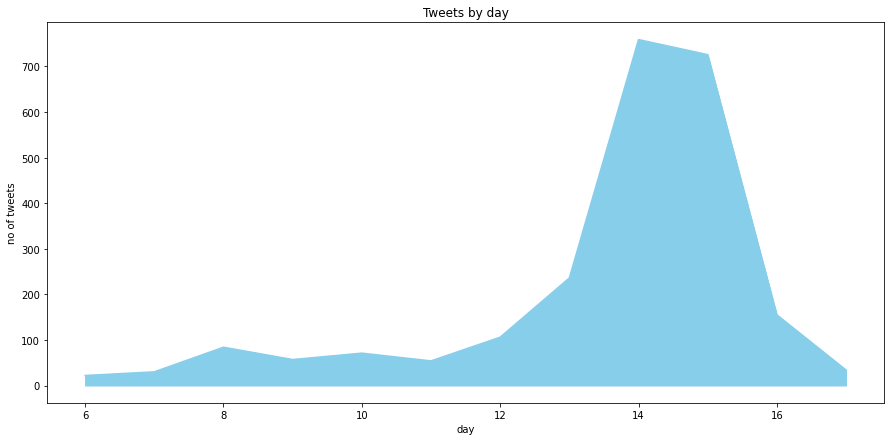

In [11]:
tweet_time = datafest_data.groupby(datafest_data.created_at.dt.day).size().reset_index(name='no_of_tweets')

plt.figure(figsize=(15,7)) #set figure size

#set the data, color and marker to use
plt.plot(tweet_time.created_at, tweet_time.no_of_tweets, color = 'skyblue') 
plt.title('Tweets by day') #set title
plt.xlabel('day') #set the x axis title
plt.ylabel('no of tweets') #set the y axis title
plt.fill_between(tweet_time.created_at, tweet_time.no_of_tweets, color = 'skyblue')

### Sentiment Analysis

In [6]:
#function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#function to get the positive, neutral and negative sentiment
def getSentiment(text):
    if text < 0:
        return 'negative'
    elif text == 0:
        return 'neutral'
    else:
        return 'positive'

In [ ]:
#create a new column for sentiment
datafest_data['tweet_sentiment'] = datafest_data['processed_tweet'].apply(getPolarity).apply(getSentiment)

In [8]:
datafest_data.head(10)

,tweet_id,created_at,tweets,location,retweets,favorites,Hashtags,processed_tweet,tweet_sentiment
0,1581028831208493056,2022-10-14 21:07:02,Day 01/ 2 of #DataFestAfrica22.\n\nDespite spe...,Nigeria,0,0,#datafestafrica22,despite spending hours traffic way still felt ...,positive
1,1581027112613396480,2022-10-14 21:00:12,Day 1 ☑️\nSome key points I took down yea🤗\n📍Y...,Lagos Nigeria,1,9,#dfa22,key points took need curious consistent thrive...,positive
2,1581027078182273024,2022-10-14 21:00:04,It's on Sunday I'll tweet my full experience a...,Canigerda,0,1,#datafestafrica22 #dfc22,ill tweet full experience post linkedin thread...,negative
3,1581025104037052416,2022-10-14 20:52:13,Hosting the maiden edition of @DataFestAfrica ...,Tired,1,8,NaN,hosting maiden edition fantastic outing dare s...,positive
4,1581025082692227072,2022-10-14 20:52:08,"Day 1 of @DataFestAfrica , I won a 4G Mifi and...",Ile Ife Nigeria,0,1,#datafestafrica2022,mifi guess lucky winner tomorrow also met beau...,positive
5,1581024723068391424,2022-10-14 20:50:42,I enjoyed all the sessions at #datafestafrica2...,Lagos Nigeria,0,0,#datafestafrica2022,enjoyed sessions met new people great people m...,positive
6,1581024098146455553,2022-10-14 20:48:13,Day 1 of @DataFestAfrica event went beyond my ...,No location,2,15,#datafestafrica2022 #dfa22,event went beyond expectations premium content...,positive
7,1581023590182318080,2022-10-14 20:46:12,Day 1 of @DataFestAfrica\n\nLearnt a number of...,Nigeria,0,1,NaN,learnt number things met people nice meeting t...,positive
8,1581021239984156672,2022-10-14 20:36:52,Day 1 of @DataFestAfrica done with my cute han...,Lagos,0,3,#dfa22 #datafestafrica2022,done cute handsome infant lets assemble tomorr...,positive
9,1581019725709987841,2022-10-14 20:30:51,"This is probably a weird observation, but the ...",Remote,0,8,NaN,probably weird observation women amazing hair ...,positive


In [12]:
datafest_data['tweet_sentiment'].value_counts()

positive    1234
neutral      936
negative     164
Name: tweet_sentiment, dtype: int64

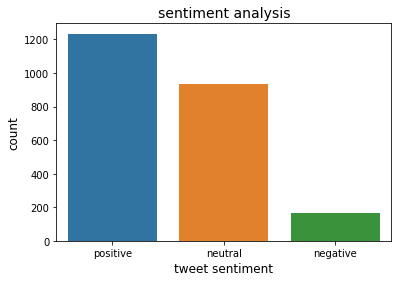

In [20]:
#group the data by the dog_stage column
sentiment_group = datafest_data.groupby('tweet_sentiment').size().reset_index(
    name="count").sort_values("count", axis = 0, ascending = False)

plt.rcParams["figure.figsize"] = (6,4) #set figure size
sns.barplot(x='tweet_sentiment', y='count', data = sentiment_group)
plt.title('sentiment analysis', fontsize=14)
plt.xlabel('tweet sentiment', size=12)
plt.ylabel('count', size=12)
plt.show()

In [ ]:
#export the csv file
datafest_data.to_csv('processed_tweets.csv', index = False)